<a href="https://colab.research.google.com/github/BlaacEnvy/StudentEnrolmentPreditction/blob/main/Student_Enrollment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   student_id  age   GPA socioeconomic_status admission_type  attendance_rate  \
0           1   24  2.85               medium        regular            59.52   
1           2   21  2.80               medium        regular            52.62   
2           3   28  2.26               medium        regular            68.92   
3           4   25  1.45               medium    conditional            68.15   
4           5   22  2.29               medium        regular            99.77   

   hours_studied_per_week  previous_dropout enrollment_status  
0                       8                 0          enrolled  
1                      34                 0      not_enrolled  
2                      10                 0          enrolled  
3                      23                 0          enrolled  
4                      36                 0          enrolled  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column                

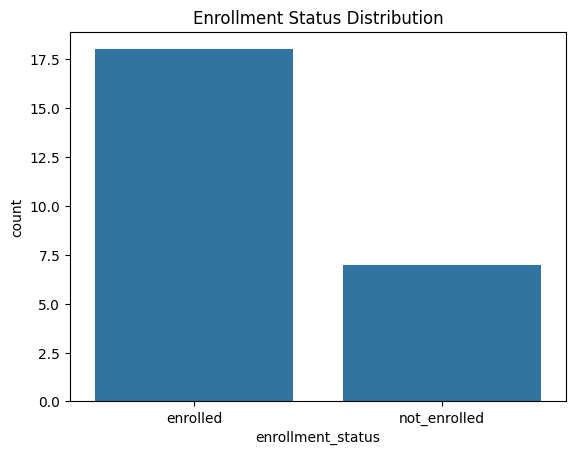

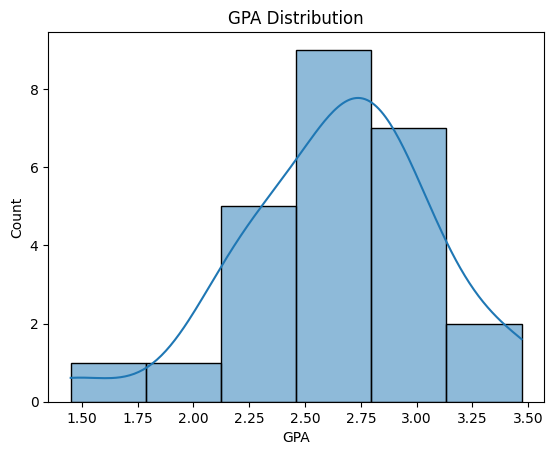

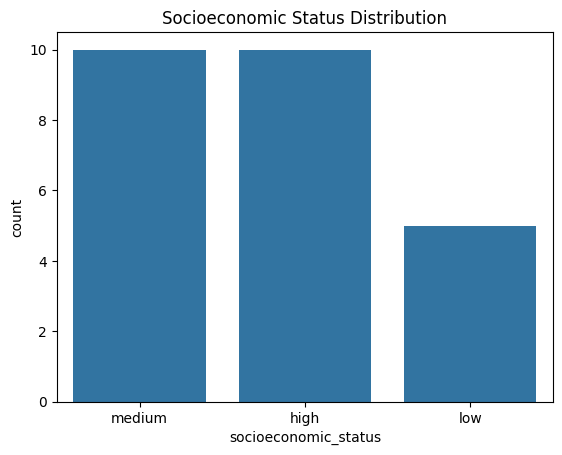

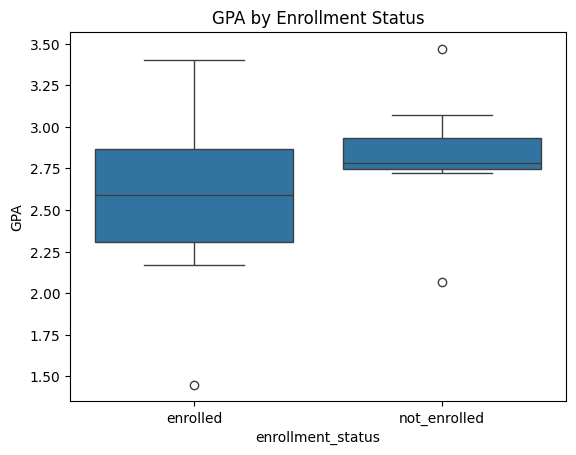

Training set size: (17, 9)
Test set size: (8, 9)
Decision Tree Classifier Results:
Accuracy: 0.5
              precision    recall  f1-score   support

       False       0.50      0.75      0.60         4
        True       0.50      0.25      0.33         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8

[[3 1]
 [3 1]]
Random Forest Model Performance:
Accuracy: 0.5
              precision    recall  f1-score   support

       False       0.50      1.00      0.67         4
        True       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-13-6cb09b9ef01e>:84: FutureWarning

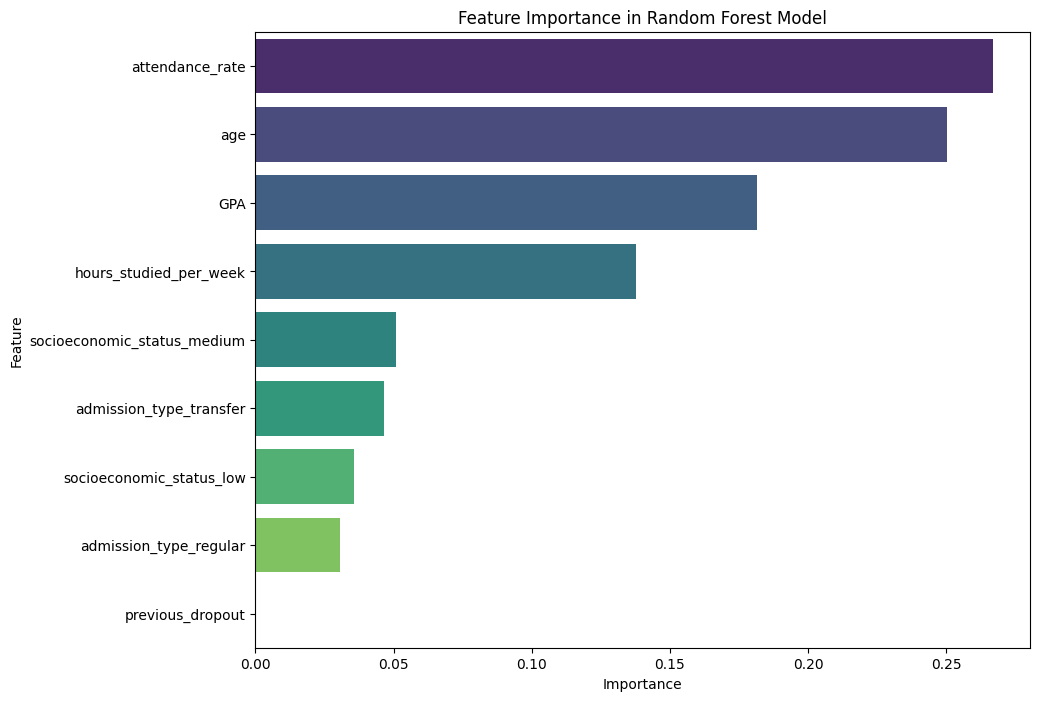

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_csv("student_data.csv")
print(data.head())
print(data.info())
print(data.isnull().sum())

sns.countplot(x='enrollment_status', data=data)
plt.title("Enrollment Status Distribution")
plt.show()

# Check GPA distribution
sns.histplot(data['GPA'], kde=True)
plt.title("GPA Distribution")
plt.show()
sns.countplot(x='socioeconomic_status', data=data)
plt.title("Socioeconomic Status Distribution")
plt.show()

# Check relationship between GPA and enrollment_status
sns.boxplot(x='enrollment_status', y='GPA', data=data)
plt.title("GPA by Enrollment Status")
plt.show()

#Dropping Missing Data
data = data.dropna()
data = pd.get_dummies(data, columns=['socioeconomic_status', 'admission_type', 'enrollment_status'], drop_first=True)
X = data.drop(columns=['student_id', 'enrollment_status_not_enrolled'])
y = data['enrollment_status_not_enrolled']

#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the resulting shapes to confirm the split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

#  Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluate the Model
y_pred = rf_model.predict(X_test)
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()







